<img src="../../img/backdrop-wh.png" alt="Drawing" style="width: 300px;"/>

# Preprocessing
* * * 


<div class="alert alert-success">  
    
### Learning Objectives 
    
* Understand why textual data needs to be preprocessed.
* Engage in common preprocessing tasks, such as lemmatization and phrase modeling.
* Distinguish between different Python packages for preprocessing.
</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
💭 **Reflection**: Reflecting on ethical implications, biases, and social impact in data science.<br>

### Sections
1. [About This Workshop](#intro)
2. [Reading Data with Pandas](#read)
3. [Dropping Columns and Missing Values](#drop)
4. [Preprocessing Text Data with SpaCy](#clean)
5. [Phrase Modeling with Gensim](#gensim)
6. [Saving Data](#save)

## Know the Basics?

This notebook expects you to know the basics of Python and the `pandas` package. If you have zero prior exposure to Python, we suggest you take a few days to go over the `Python_Basics.ipynb` notebook in the **Week0** folder first.

<a id='intro'></a>

# About This Workshop

One of the most common types of data used in machine learning and data science is text data—ranging from social media posts and news articles to customer reviews and interview transcripts. Text is incredibly rich in information, but it doesn’t come pre-packaged for analysis. Machine learning models can’t work directly with words—they need numbers. That’s why text preprocessing is a critical first step in any text-based pipeline.

In this workshop, you’ll learn how to transform raw text into a structured, numeric format that machine learning algorithms can use. This means building a preprocessing pipeline—a series of steps that clean, tokenize, and normalize text.

Why does this matter? As AI tools become more powerful and accessible, it’s tempting to rely on them without understanding how they work. But to use AI responsibly—and interpret its results meaningfully—you need to understand the basics. These notebooks builds that conceptual foundation.

You’ll practice:
1.	Reading, manipulating, and writing .csv files using `pandas`;
2.	Preprocessing text with essential techniques like tokenization, stop-word removal, n-gram extraction, and lemmatization using `spaCy`.

## Don't Be Overwhelmed
This module builds on what you learned in Python Basics, especially with pandas. If you’re newer to Python, some of the code may feel like a lot. That’s okay. You don’t need to master every detail right away. Focus on the big picture: how these functions help us turn messy text into analyzable data.

**⚠️ Warning**: Some code cells will take time to run. If you see a `*` next to a code cell, it’s still processing. The good news is that once your pipeline is complete, you can save the output and skip re-running these cells later.

### Note on package installation
The below cell makes sure all the Python packages needed for this lesson are installed.
If you’re working on Datahub, you might not have everything yet.
Running this cell will check for each package and install it if it’s missing, so your notebook runs smoothly.

- If you are running this notebook on **DataHub**, you may need to **uncomment and run** the `%pip install ...` line below if you get an error about a missing package. Restart your kernel after running this cell!
- If you are working **locally** (on your own computer), you should already have all required packages installed via your Conda environment (see the ***"Local Python and Jupyter Setup"*** page on bCourses). Only use the `pip install` line if you see an ImportError and know what you’re doing.

In [1]:
# Install all required packages for this lesson
#%pip install gensim spacy pandas tqdm

# Install spacy English model
import spacy
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    from spacy.cli import download
    download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')

Note: you may need to restart the kernel to use updated packages.


<a id='read'></a>

# Recap: Our Data

The first step is to read the data we are going to work with into Python so that we can work with it.

We're using the dataset taken from the subreddit [r/amitheasshole](http://www.reddit.com/r/AmItheAsshole). 

The subreddit describes itself as follows:

<img src="../../img/aita_desc.png" alt="Am I The Asshole - description" width="300"/>

The subreddit has structures in place that the community follow to come to a decision about the situation. First, OP (original poster) writes up the situation, asking AITA (Am I The Asshole). In response, for eighteen hours, the community of the subreddit will respond to the post with one of five judgments: YTA (You’re The Asshole), NTA (Not The Asshole), ESH (Everyone Sucks Here), NAH (No Assholes Here), or INFO (Not Enough Info).

💡 **Tip**: For more info on the subreddit, see [here](https://www.inverse.com/culture/am-i-the-asshole/amp). 

First, we have to read the data. We'll use a subset of the full dataset consisting of the top most popular posts, the assumption being that this will yield the most interesting results (`aita_sub_top_sm.csv`). We use `pd.read_csv()` to import the .csv file as a DataFrame.

In [1]:
# Import the pandas package
import pandas as pd 

# Read the csv file
df = pd.read_csv('../../data/aita_top_submissions.csv')

In [2]:
df[:3]

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,427576402,t3_72kg2a,1506433689,1.0,0.0,Ritsku,AITA for breaking up with my girlfriend becaus...,NaN,My girlfriend recently went to the beach with ...,679.0,AmItheAsshole,NaN,4917.0,434.0,no a--holes here,NaN,NaN,NaN
1,551887974,t3_94kvhi,1533404095,1.0,0.0,hhhhhhffff678,AITA for banning smoking in my house and telli...,NaN,My parents smoke like chimneys. I used to as w...,832.0,AmItheAsshole,NaN,2076.0,357.0,asshole,ass,NaN,NaN
2,552654542,t3_951az2,1533562299,1.0,0.0,creepatthepool,AITA? Creep wears skimpy bathing suit to pool,NaN,Hi guys. Throwaway for obv reasons.\n\nI'm a f...,23.0,AmItheAsshole,NaN,1741.0,335.0,Shitpost,NaN,NaN,NaN


Let's have a look at look and the shape, top rows, and columns of the data.

In [3]:
df.shape

(20000, 18)

In [4]:
df.head()

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,427576402,t3_72kg2a,1506433689,1.0,0.0,Ritsku,AITA for breaking up with my girlfriend becaus...,NaN,My girlfriend recently went to the beach with ...,679.0,AmItheAsshole,NaN,4917.0,434.0,no a--holes here,NaN,NaN,NaN
1,551887974,t3_94kvhi,1533404095,1.0,0.0,hhhhhhffff678,AITA for banning smoking in my house and telli...,NaN,My parents smoke like chimneys. I used to as w...,832.0,AmItheAsshole,NaN,2076.0,357.0,asshole,ass,NaN,NaN
2,552654542,t3_951az2,1533562299,1.0,0.0,creepatthepool,AITA? Creep wears skimpy bathing suit to pool,NaN,Hi guys. Throwaway for obv reasons.\n\nI'm a f...,23.0,AmItheAsshole,NaN,1741.0,335.0,Shitpost,NaN,NaN,NaN
3,556350346,t3_978ioa,1534254641,1.0,0.0,Pauly104,AITA for eating steak in front of my vegan GF?,NaN,"Yesterday night, me and my GF decided to go ou...",1011.0,AmItheAsshole,NaN,416.0,380.0,not the a-hole,not,NaN,NaN
4,560929656,t3_99yo3c,1535126620,1.0,0.0,ThatSpencerGuy,AITA for not wanting to cook my mother-in-law ...,NaN,"My wife and I are vegetarians, much to my in-l...",349.0,AmItheAsshole,NaN,1158.0,360.0,not the a-hole,not,NaN,NaN


In [5]:
# This allows you to quickly see which columns you have
list(df)

['idint',
 'idstr',
 'created',
 'self',
 'nsfw',
 'author',
 'title',
 'url',
 'selftext',
 'score',
 'subreddit',
 'distinguish',
 'textlen',
 'num_comments',
 'flair_text',
 'flair_css_class',
 'augmented_at',
 'augmented_count']

This particular dataset only includes the original posts in the subreddit (so not the comments on the posts). 

There is one row per post in the dataset. The columns are as follows:

-  `idstr`: ID of the post.
- `created`: the time of the post's creation.
- `author`: Reddit author of the post.
- `title`: Title of the post.
- `selftext`: Text of the post.
- `score`: Amount of upvotes minus downvotes.
- `textlen`: Amount of words.
- `num_comments`: Amount of comments.
- `nsfw`: Flag for NSFW content.
- `flair_text`: A 'tag' that users within a subreddit can add.

## 💭 **Reflection**
Which of these columns could contain interesting data for your research purposes? How could you make use of things like the number of comments, NSFW flags, or even text length, in relation to a discourse community?

## Reviewing Posts
Before we clean or analyze text, it’s helpful to understand how long and how popular these posts are. 

Let's first plot how the length of Reddit posts varies across the dataset.

Why this matters:
- Very short posts might not be meaningful for topic modeling or embeddings.
- Very long posts might dominate certain analyses.

Note that `plt.savefig` exports this figure (as a PNG) in the current folder, so you can reuse it in your final project or website writeup to justify your preprocessing decisions.

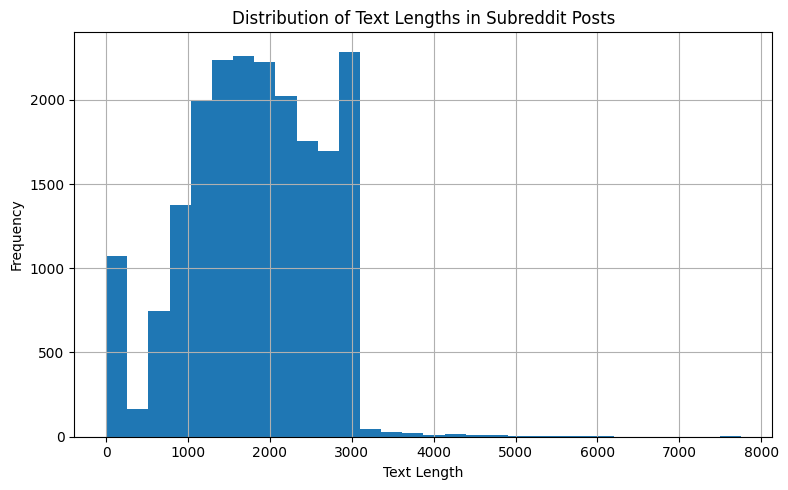

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df['textlen'].dropna().hist(bins=30)
plt.title("Distribution of Text Lengths in Subreddit Posts")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../../img/text_length_distribution.png", dpi=300)  # exportable
plt.show()

We can also plot the comment count of posts vs. their score.

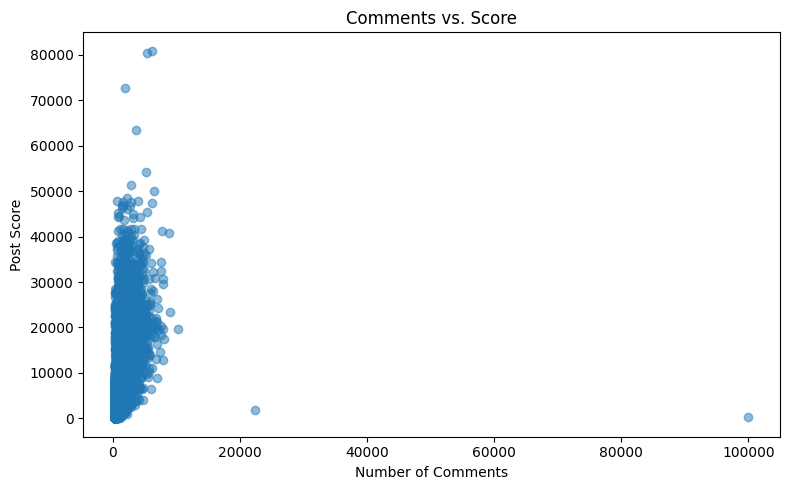

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df['num_comments'], df['score'], alpha=0.5)
plt.title("Comments vs. Score")
plt.xlabel("Number of Comments")
plt.ylabel("Post Score")
plt.tight_layout()
plt.savefig("comments_vs_score.png", dpi=300)
plt.show()

A few outliers really stand out: posts with tens of thousands of comments, or a score over 80,000. These may be exceptional cases: viral posts, controversial topics, or anomalies.

**💡 Tip:** Try sorting your data to find those outlier posts and read them. What makes them so different? Does high engagement correlate with controversy, clarity, humor, or something else?

This kind of plot helps you make informed decisions about filtering, case selection, or even choosing a specific subreddit to focus on.

In [10]:
# Sort by score to find top outliers
df.sort_values(by='score', ascending=False).head(3)

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
2947,797709732,t3_d6xoro,1568998300,1.0,0.0,DarthCharizard,META: This sub is moving towards a value syste...,NaN,I’ve enjoyed reading and posting on this sub f...,80915.0,AmItheAsshole,NaN,9.0,6215.0,META,NaN,NaN,NaN
15292,1472895100,t3_ocx94s,1625315782,1.0,0.0,OnlyInQuebec9,AITA for telling my wife the lock on my daught...,NaN,My brother in-law (Sammy) lost his home shortl...,80334.0,AmItheAsshole,NaN,2664.0,5318.0,Not the A-hole,not,NaN,NaN
430,664921441,t3_azvko1,1552322462,1.0,0.0,Renegadesrule33,"UPDATE, AITA for despising my mentally handica...",NaN,"I'm back like I said I would be,. My [original...",72776.0,AmItheAsshole,NaN,9.0,1989.0,UPDATE,NaN,NaN,NaN


In [11]:
# Sort by comments to find top outliers
df.sort_values(by='num_comments', ascending=False).head(5)

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
6882,1018833816,t3_gul57c,1591020054,1.0,0.0,SnausageFest,Introducing Monthly Open Forums,NaN,Welcome to the monthly AITA open forum. **We'r...,253.0,AmItheAsshole,NaN,2432.0,99991.0,Open Forum,NaN,NaN,NaN
6033,971626846,t3_g2hc2m,1587051826,1.0,0.0,Phteven_j,Check out /r/choosemyalignment for a D&amp;D-t...,NaN,Greetings my judgmental friends! I would like ...,1874.0,AmItheAsshole,moderator,1008.0,22452.0,META,NaN,NaN,NaN
1661,735581203,t3_c5y237,1561592428,1.0,0.0,nipslip911,AITA for giving my concert ticket to another g...,NaN,"I am 24M and I have a friend who is 21, she is...",19659.0,AmItheAsshole,NaN,1897.0,10265.0,Asshole,ass,NaN,NaN
4166,868798183,t3_ed9cyv,1576843739,1.0,0.0,Throwaway36245128,AITA for buying my wife a Roomba for Christmas?,NaN,This happened last year but since it still get...,23325.0,AmItheAsshole,NaN,1704.0,8993.0,Asshole,ass,NaN,NaN
4362,878409195,t3_eizcvf,1577977774,1.0,0.0,HENNYDEFN,AITA for saying my babysitting rates are $35 a...,NaN,"I'm a software engineer, with a full time job ...",40705.0,AmItheAsshole,NaN,2591.0,8895.0,Not the A-hole,not,NaN,NaN


## Removing Missing Values

Data collected from the internet typically has missing values and other inconsistencies. It's typically called "dirty data", and it needs to be cleaned up first.

First, we want to select the rows of deleted posts. On Reddit, removed posts get flagged as "[removed]" or "[deleted]". We should remove these posts, since they'll lack any text. 

We can do this using the [`isin()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) method. We run it on the `selftext` column and include a list of phrases that indicate a removed post – that is, "[removed]" and "[deleted]".

The following line of code will select all lines that do not have 'removed' or 'deleted' in the post's text. The `~` means 'not'.

In [7]:
# Select all rows that don't have '[removed]' or '[deleted]'
df = df.loc[~df['selftext'].isin(['[removed]', '[deleted]' ]),:]

# Select all rows that have >3 characters in selftext
df = df.loc[df['selftext'].str.len() > 3]

df.shape

(16309, 18)

🔔 **Question**: How many posts are left in the dataset? How many did we lose?

## Removing Null Values

Next, we need to drop **null values**. These are values that are totally missing. In this case, the web scraper may have been unable to extract text for the post. They are replaced with the value **NaN**, which stands for a null value in `pandas`. We need to deal with null values in any column that we plan to use for analysis, which in this case is the `selftext` column. We can use [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna) to remove the rows with null values in the target column. 

Let's use the `dropna()` method on the dataframe. We use the argument `subset`, which you set to `'selftext'`). Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) if you want a reminder of how this works!

In [8]:
df = df.dropna(subset=['selftext'])

🔔 **Question**: How many posts are left in the dataset? How many did we lose?

In [9]:
df.shape

(16309, 18)

<a id='preprocess'></a>

# Preprocessing Text Data with SpaCy

Text data collected in the real world is always going to be variable, which poses a challenge for analysis. But by reducing some of this variation, we can help improve our results. For example, if we are counting instances of the word `"weather"` in text, we might want the strings `"weather"`, `"weather."`, and `"Weather"` to all be counted as instances of the same word. However, in raw text form, these would be treated as separate strings. By performing text cleaning, we can standardize these cases and make our data easier to analyze. Some common preprocessing steps are:

- Removing punctuation
- Removing URLs
- Removing stopwords (non-content words like "a", "the", "is", etc.)
- Lowercasing
- Tokenization (e.g., splitting a sentence into distinct "chunks" or "tokens")
- Lemmatization, or changing words to 'dictionary form' (e.g., runs, running, ran -> run)

Fortunately, we don't need to code every one of these steps. Instead, we will use a package called [spaCy](https://spacy.io/) to do these things. If the text you'd like to process is general-purpose English language text (i.e., not domain-specific, like medical literature), `spaCy` is ready to use out-of-the-box. 

However, we need to do one more installation: the underlying language "pipeline" that spaCy uses. This pipeline contains all the rules and code spaCy uses to perform text preprocessing. Using this pipeline, spaCy will extract information about **attributes** of our text: the tokens, lemmas, stopwords, and so on.

The most common pipeline to use is the [`en_core_web_sm`](https://spacy.io/models/en/#en_core_web_sm) pipeline, which is the English ("en") model, which contains many "core" functions, is developed partially with "web" data, and is the small version ("sm").

We can now use this `nlp` object--holding a spaCy pipeline--to parse a Reddit post in our dataset.

In [10]:
# Parse a reddit post in the dataset
parsed_post = nlp(df['selftext'][1000])
print(parsed_post)

“Are we the assholes” really because my husband made the decision with me.

My father passed away a few months ago and left a pretty sizeable estate behind. The majority went to my sister and me, with an equal amount of money to each grandchild (or so I thought.) 

My kids are grown so I never really thought to reach out about the money because the executor was handling it. My daughter never mentioned it, but she’s always been frugal so I figured she didn’t want to discuss it and had some plan for it.

Recently we had a family meal and my son brought up the inheritance, and my daughter revealed that she had received nothing and didn’t know that any of her cousins or her brother had. It is very clear to us that she was cut from the will because my father always disapproved of my son in law.

My husband and I talked it over and decided to give a portion of our inheritance to our daughter and her husband to match the amount given to the other grandkids. We are still working with a lawyer 

The base text looks the same, but we can take a closer look at `parsed_post` to see what happened under the hood. A lot of the information SpaCy has gathered operates on each **token** in the text. 

## SpaCy Attributes

When we ran spaCy on our post, it automatically tokenized all our data. If we loop over our `parsed_post`, we will loop over all of these tokens. We can now look at some **attributes** that SpaCy has extracted for each token. 

We will save these attributes in a list of dictionary items, then put that list into a DataFrame like we did in Python Fundamentals.

In [11]:
# Create an empty list to store token attributes
token_data = []

# Iterate over tokens and extract attributes
for token in parsed_post:
    token_data.append({
        "text": token.text,
        "lemma": token.lemma_,
        "pos": token.pos_,
        "tag": token.tag_,
        "dep": token.dep_,
        "shape": token.shape_,
        "is_alpha": token.is_alpha,
        "is_stop": token.is_stop,
    })

# Create a pandas DataFrame from the token data
token_df = pd.DataFrame(token_data)

# Display the DataFrame
token_df

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,“,"""",PUNCT,``,punct,“,False,False
1,Are,be,AUX,VBP,ROOT,Xxx,True,True
2,we,we,PRON,PRP,nsubj,xx,True,True
3,the,the,DET,DT,det,xxx,True,True
4,assholes,asshole,NOUN,NNS,attr,xxxx,True,False
...,...,...,...,...,...,...,...,...
314,giving,give,VERB,VBG,conj,xxxx,True,False
315,our,our,PRON,PRP$,poss,xxx,True,True
316,son,son,NOUN,NN,dative,xxx,True,False
317,anything,anything,PRON,NN,dobj,xxxx,True,True


As you can see, `spaCy` does a *lot* of work. Let's have a look at the [documentation](https://spacy.io/api/attributes) to see which attributes we are looking at here.

## Preprocessing all data
Now we can scale up this process to our whole dataset. Up until this point, we have run the preprocessing pipeline on a single post, but we want to automate our code to process all posts at once. 

To do this, Let's define a helper function that we'll use for preprocessing. The `process_text` function will use `spaCy` to:

- Iterate over the dataframe.
- Segment the threads into individual sentences.
- Remove punctuation, unneccessary tokens such as stopwords, and excess whitespace.
- Lemmatize the text.

The function will automate the preprocessing for the posts in this dataset. Don't worry too much about deciphering each line of code. The main goal of this function is to do a lot of the preprocessing for you so that you can use the text in analysis going forward. 

**You can find this function in the `1_Preprocessing_Project.ipynb` notebook to use on your own data.**

In [12]:
def process_text(text):
    """Function to process a single text string."""

    text = text.replace('\n', '')
    parsed = nlp(text, disable=["tok2vec", "ner"])

    # Gather lowercased, lemmatized tokens that are not punctuation, space, or digit
    tokens = [
        token.lemma_.lower() if token.lemma_ != '-PRON-'
        else token.lower_ 
        for token in parsed 
        if not (token.is_punct or token.is_space or token.is_digit)
    ]

    # Remove specific lemmatizations, and words that are not nouns or adjectives
    tokens = [
        lemma
        for lemma in tokens
        if not lemma in ["'s",  "’s", "’"]
    ]

    # Remove stop words
    tokens = [
        token 
        for token in tokens 
        if token not in spacy.lang.en.stop_words.STOP_WORDS
    ]

    return ' '.join(tokens)

We also create the `preprocess` function, which will call the above helper function and `apply()` it over our dataframe.

Note that we are setting a parameter `text_col` which refers to the name of the text column we are expecting. We do this so it's easy to run `preprocess` when the text column has another name. This is the case when you're working with .CSV files with comments--the text column will not be called `selftext` but `body`. 

In [13]:
from tqdm import tqdm

def preprocess(df, text_col='selftext'):
    """Preprocessing function to apply to a dataframe."""
    # Enable tqdm for pandas
    tqdm.pandas(desc="Processing text")
    
    df['pp_text'] = df[text_col].progress_apply(process_text)
    return df

Now let's run `preprocess()` over our dataframe. **This will take a few minutes to run.**

In [14]:
# This may take a while
df = preprocess(df, text_col='selftext')

Processing text: 100%|████████████████████| 16309/16309 [07:59<00:00, 34.01it/s]


In [15]:
df.head()

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count,pp_text
0,427576402,t3_72kg2a,1506433689,1.0,0.0,Ritsku,AITA for breaking up with my girlfriend becaus...,NaN,My girlfriend recently went to the beach with ...,679.0,AmItheAsshole,NaN,4917.0,434.0,no a--holes here,NaN,NaN,NaN,girlfriend recently went beach friends tiny bi...
1,551887974,t3_94kvhi,1533404095,1.0,0.0,hhhhhhffff678,AITA for banning smoking in my house and telli...,NaN,My parents smoke like chimneys. I used to as w...,832.0,AmItheAsshole,NaN,2076.0,357.0,asshole,ass,NaN,NaN,parents smoke like chimneys quit wife got youn...
2,552654542,t3_951az2,1533562299,1.0,0.0,creepatthepool,AITA? Creep wears skimpy bathing suit to pool,NaN,Hi guys. Throwaway for obv reasons.\n\nI'm a f...,23.0,AmItheAsshole,NaN,1741.0,335.0,Shitpost,NaN,NaN,NaN,hi guys throwaway obv reasons i'm female child...
3,556350346,t3_978ioa,1534254641,1.0,0.0,Pauly104,AITA for eating steak in front of my vegan GF?,NaN,"Yesterday night, me and my GF decided to go ou...",1011.0,AmItheAsshole,NaN,416.0,380.0,not the a-hole,not,NaN,NaN,yesterday night gf decided eat vegan day going...
4,560929656,t3_99yo3c,1535126620,1.0,0.0,ThatSpencerGuy,AITA for not wanting to cook my mother-in-law ...,NaN,"My wife and I are vegetarians, much to my in-l...",349.0,AmItheAsshole,NaN,1158.0,360.0,not the a-hole,not,NaN,NaN,wife vegetarians laws vocal annoyance year vis...


## 💭 Reflection

In one of the lines of our `preprocess` function, we are getting rid of stopwords. These are the most common words in any language (like articles, prepositions, pronouns, conjunctions), such as "the", "a", "an", and "so".

Stopwords are considered "low-level information": the removal of these words does not show any negative consequences on the model we train for our task. It also reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.

Think about what **ethical implications** there could be for removing stopwords. What kind of information are we losing here? What would be a situation in which you would want to keep stopwords?

<a id='gensim'></a>

# Phrase Modeling with Gensim

Many kinds of NLP methods work better when using **N-grams**. An n-gram treats small groups of words as tokens rather than single words. This allows words that frequently appearing together to be concatenated (e.g. "new york" means something different and more specific than "new" and "york" separately). We most commonly use **bigrams** (2-word phrases) and **trigrams** (3-word phrases).

**Phrase modeling** is an approach to learning combinations of tokens that together represent meaningful multi-word concepts. So rather than treating every pair of words as a n-gram, we look for pairs that occur together frequently and identify those as n-grams. This constrains the token space by limiting the number of multi-word tokens, but requires information about what words co-occur together frequently, which is where **phrase models** come in. We can develop phrase models by looping over the the words in our lemmatized dataset and looking for words that co-occur (i.e., appear one after another) together much more frequently than you would expect them to by random chance. 

`gensim` is a popular natural language processing package. We will use it in later lessons for topic modeling and word embeddings. It also contains a [`Phrases`](https://radimrehurek.com/gensim/models/phrases.html) model that implements phrase modeling for identifying bigrams, trigrams, quadgrams, etc. `Phrases` detects phrases based on collocation counts. It builds a model of input text that you then can use on other data.

`gensim` detects a bigram if a scoring function for two words exceeds a threshold. The two important arguments to `Phrases` are `min_count` and `threshold`. The higher the values of these parameters, the harder it is for words to be combined to bigrams. We can change the value of these parameters to fine-tune our model. Try changing `min count` and `threshold` below. How does that change the output?

In [16]:
from gensim.models.phrases import Phrases, Phraser

# "Documents"
docs = ['new york is great',
        'new york is in the united states',
        'i love to stay in new york',
        'people visit the united states']
# Rudimentary tokenization
tokens = [doc.split(" ") for doc in docs]
# Create bigrams
bigram = Phrases(tokens, min_count=2, threshold=3, delimiter='_')
# Freeze bigrams and apply to data
bigram_phraser = Phraser(bigram)
[bigram_phraser[token] for token in tokens]

[['new_york', 'is', 'great'],
 ['new_york', 'is', 'in', 'the', 'united', 'states'],
 ['i', 'love', 'to', 'stay', 'in', 'new_york'],
 ['people', 'visit', 'the', 'united', 'states']]

Now let's make a bigram and trigram model for our data. Starting from the preprocessed lemmas from the `preprocess()` function above, we can use the `gensim` models to identify bigrams and trigrams in the dataset. Again, the `min_count` and `threshold` arguments can be modified to change the output of the model. 

In the code below we make a bigram model using the gensim `Phrases` object, and then build a trigram model on top of that bigram model. Finally, we use the lemmas from the preprocessed text to make a trigram model of the data. We are processing the whole dataset in this cell, so it may take a little while to run.

In [17]:
from tqdm import tqdm

# Create bigram and trigram models
print("Tokenizing documents...")
tokens = [doc.split(" ") for doc in tqdm(df['pp_text'], desc="Tokenizing")]

print("Training bigram model...")
bigram = Phrases(tokens, min_count=10, threshold=100)

print("Training trigram model...")
trigram = Phrases(bigram[tokens], min_count=10, threshold=50)  

bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# Form trigrams with progress
print("Forming trigrams...")
df['pp_text'] = [' '.join(trigram_phraser[bigram_phraser[doc]]) 
                 for doc in tqdm(tokens, desc="Creating trigrams")]

Tokenizing documents...


Tokenizing: 100%|█████████████████████| 16309/16309 [00:00<00:00, 153306.16it/s]

Training bigram model...


Training trigram model...
Forming trigrams...


Creating trigrams: 100%|████████████████| 16309/16309 [00:01<00:00, 9439.87it/s]


In [18]:
df.head()

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count,pp_text
0,427576402,t3_72kg2a,1506433689,1.0,0.0,Ritsku,AITA for breaking up with my girlfriend becaus...,NaN,My girlfriend recently went to the beach with ...,679.0,AmItheAsshole,NaN,4917.0,434.0,no a--holes here,NaN,NaN,NaN,girlfriend recently went beach friends tiny bi...
1,551887974,t3_94kvhi,1533404095,1.0,0.0,hhhhhhffff678,AITA for banning smoking in my house and telli...,NaN,My parents smoke like chimneys. I used to as w...,832.0,AmItheAsshole,NaN,2076.0,357.0,asshole,ass,NaN,NaN,parents smoke like chimneys quit wife got youn...
2,552654542,t3_951az2,1533562299,1.0,0.0,creepatthepool,AITA? Creep wears skimpy bathing suit to pool,NaN,Hi guys. Throwaway for obv reasons.\n\nI'm a f...,23.0,AmItheAsshole,NaN,1741.0,335.0,Shitpost,NaN,NaN,NaN,hi guys throwaway obv reasons i'm female child...
3,556350346,t3_978ioa,1534254641,1.0,0.0,Pauly104,AITA for eating steak in front of my vegan GF?,NaN,"Yesterday night, me and my GF decided to go ou...",1011.0,AmItheAsshole,NaN,416.0,380.0,not the a-hole,not,NaN,NaN,yesterday night gf decided eat vegan day going...
4,560929656,t3_99yo3c,1535126620,1.0,0.0,ThatSpencerGuy,AITA for not wanting to cook my mother-in-law ...,NaN,"My wife and I are vegetarians, much to my in-l...",349.0,AmItheAsshole,NaN,1158.0,360.0,not the a-hole,not,NaN,NaN,wife vegetarians laws vocal annoyance year vis...


In [19]:
# Have a look at a slice of the first post
df['pp_text'][0][25:35]

'beach frie'

Once our phrase model has been trained on our total dataset, we can apply it to new text. When our model encounters two tokens in new text that identifies as a phrase, it will merge the two into a single new token.


In [20]:
trigram_phraser["That", "was", "not", "a", "big", "deal"]

['That', 'was', 'not', 'a', 'big_deal']

Let's take a look at the bigram parser. We can use `.keys()` to identify the bigrams in the dataset. How many bigrams were identified by the parser?

In [21]:
len(bigram_phraser.phrasegrams.keys())

775

Let's print the first few bigrams identified in the model as well to check if they seem like appropriate bigrams. If not, we can change the parameters of the bigram model to adjust the sensitivity of the model.

In [22]:
list(bigram_phraser.phrasegrams.keys())[:10]

['worth_mentioning',
 'big_deal',
 'security_camera',
 'mashed_potatoes',
 'walking_eggshells',
 'piece_shit',
 'forgot_mention',
 'high_school',
 'outside_perspective',
 'gain_weight']

In [23]:
# Look at trigrams
[trigram for trigram in list(trigram_phraser.phrasegrams.keys()) if trigram.count('_') == 2]

['blocked_social_media',
 'social_media_accounts',
 'long_story_short',
 'mental_health_issues',
 'upper_middle_class',
 'giving_silent_treatment',
 'bit_taken_aback',
 'r_amitheasshole_comments',
 'real_estate_agent',
 'playing_video_games',
 'plays_video_games',
 'high_school_sweetheart',
 'credit_card_debt',
 'hell_broke_loose',
 'posting_social_media',
 'blah_blah_blah',
 'rubbed_wrong_way',
 'straw_broke_camel',
 'play_video_games',
 'posted_social_media',
 'worst_case_scenario',
 'giving_cold_shoulder',
 'passive_aggressive_comments',
 '=_share&utm_medium',
 'mobile_sorry_formatting',
 'slammed_door_face',
 'post_social_media',
 'straw_broke_camels',
 'aunts_uncles_cousins',
 'monthly_open_forum',
 'place_share_meta',
 'dialog_mod_team.#keep',
 'civil_rules_apply',
 'discourage_brigading_needs',
 'context_use_modmail',
 'uncensored_screenshots_comments']

## 💭 Reflection
Preprocessing decisions shape what patterns we see. What does it mean to clean text “correctly”? What gets lost when we strip away nuance, slang, or punctuation?
Can data cleaning be a kind of interpretation?

<a id='save'></a>

# Saving Data

Let's save this cleaned-up dataframe in a new CSV.

In [24]:
df.to_csv('../../data/aita_pp.csv', index=False)

After running `to_csv()`, you'll see the data file gets added in the "data" folder, which is in the main folder of this repository. 

🔔 **Question**: Can you find the data file using a file browser (either in Jupyter or on your machine)?

<div class="alert alert-success">

## ❗ Key Points

* The Pandas `DataFrame` format can be used to save Reddit data.
* Before cleaning text data, it is a good idea to drop rows and columns you don't need.
* SpaCy can be used to preprocess textual data, including tokenization and lemmatization.
* Gensim can be used to combine tokens into N-grams.
* Python objects can be easily saved into binary format. This is called "pickling".

</div>